In [1]:
import numpy as np
import mcmc_infinity as mc
import matplotlib.pyplot as plt
import seaborn as sns

seed = 12345

# Plot the Target Density

For this example we use the two-dimensional Rastrigrin function.

In [2]:
dim = 2

target = mc.test_functions.rastrigin.Rastrigin(alpha=0.1, dim=dim)

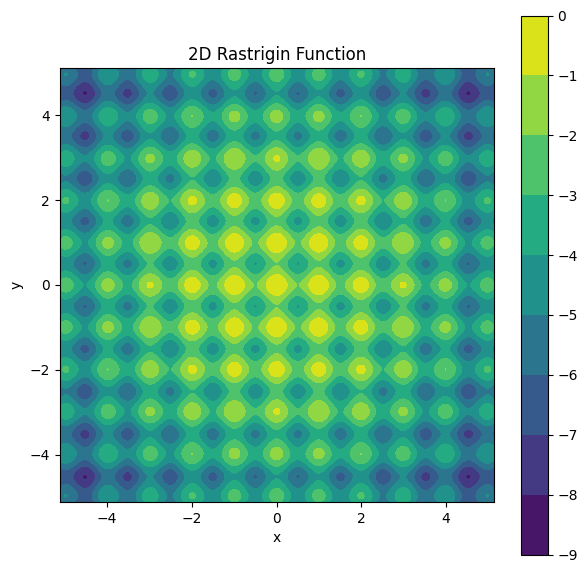

In [3]:
x = np.linspace(-5.12, 5.12, 300)
y = np.linspace(-5.12, 5.12, 300)
X, Y = np.meshgrid(x, y)
Z = target(np.stack((X, Y), axis=-1))

fig, ax = plt.subplots(figsize=(7, 7))
cf = ax.contourf(X, Y, Z, levels=np.linspace(-9, 0, 10))
cbar = plt.colorbar(cf)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("2D Rastrigin Function")
ax.set_aspect('equal')
plt.show()

# Regular MCMC

In [6]:
bounds = [[-5.12, 5.12], [-5.12, 5.12]]

x0 = [[0.0, 0.0]]

Q = mc.symmetric_gaussian_proposal.SymmetricGaussianProposal(dim, bounds=bounds)

sampler = mc.sampler.PerfectSampler(target, Q, x0, seed=seed, 
                                    proposal_kwargs={'sigma': 0.1})

samples, acceptance = sampler.evolve_chain(x0[0], 1000)

print(f"Acceptance rate: {acceptance}")

samples


Acceptance rate: 0.976


Array([[ 0.        ,  0.        ],
       [-0.25485697,  0.06127187],
       [-0.15666822, -0.03211379],
       ...,
       [ 1.72991254, -0.68188753],
       [ 1.72991254, -0.68188753],
       [ 1.70540723, -0.68760988]], dtype=float64)

# Proposal

The perfect MCMC sampler works with a common proposal.
The user must provide this. 
Here we use a uniform proposal in the range $(-5.12, 5.12)$ along each dimension.

The proposal distribution is denoted $Q$.

In [ ]:
proposal = mc.uniform_proposal.UniformProposal(dim, bounds)

# Initialise the Sampler

In [ ]:
x0 = [[0.0, 0.0], [-4.5, -4.5]]

sampler = mc.sampler.PerfectSampler(target, proposal, x0, seed=seed)

# A Perfect Sample

The following plot illustrates the "binary stepping back" idea of Propp & Wilson
for obtaining a perfect sample from the target distribution.

sample, all_output = sampler.get_perfect_sample(2, show_all_output=True)

In [ ]:
sample, all_output = sampler.get_perfect_sample(2, show_all_output=True)

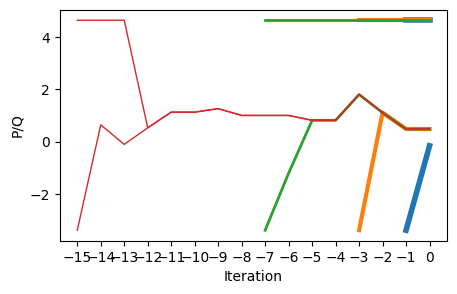

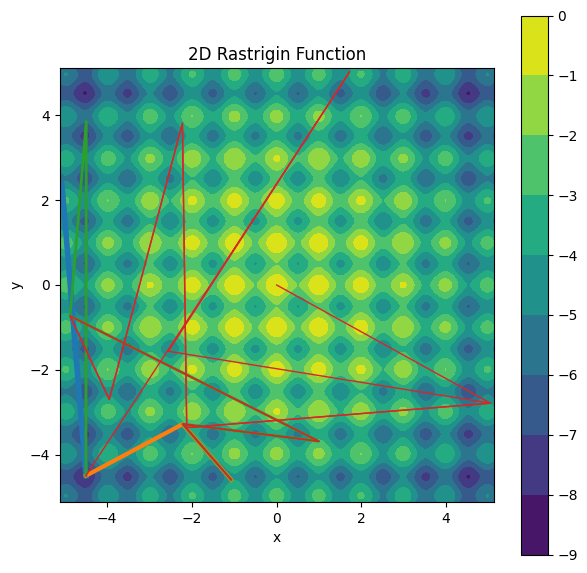

In [ ]:
fig, ax = plt.subplots(figsize=(5,3))

for i, chains in enumerate(all_output):
    chain0 = chains[0]
    chain1 = chains[1]

    y0 = target(chain0)-proposal(chain0)
    y1 = target(chain1)-proposal(chain1)

    x = np.arange(1-len(y0), 1)

    lw = len(all_output)-i

    ax.plot(x, y0, color='C{}'.format(i), lw=lw)
    ax.plot(x, y1, color='C{}'.format(i), lw=lw)

ax.set_xticks(x)
ax.set_xlabel('Iteration')
ax.set_ylabel('P/Q')
plt.show()


fig, ax = plt.subplots(figsize=(7, 7))

for i, chains in enumerate(all_output):
    chain0 = chains[0]
    chain1 = chains[1]
    lw = len(all_output)-i
    ax.plot(chain0[:, 0], chain0[:, 1], color='C{}'.format(i), lw=lw)
    ax.plot(chain1[:, 0], chain1[:, 1], color='C{}'.format(i), lw=lw)

cf = ax.contourf(X, Y, Z, levels=np.linspace(-9, 0, 10))
cbar = plt.colorbar(cf)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("2D Rastrigin Function")
ax.set_aspect('equal')
plt.show()

# Perfect Sampling

We can now repeat this to get as many i.i.d perfect samples as required.

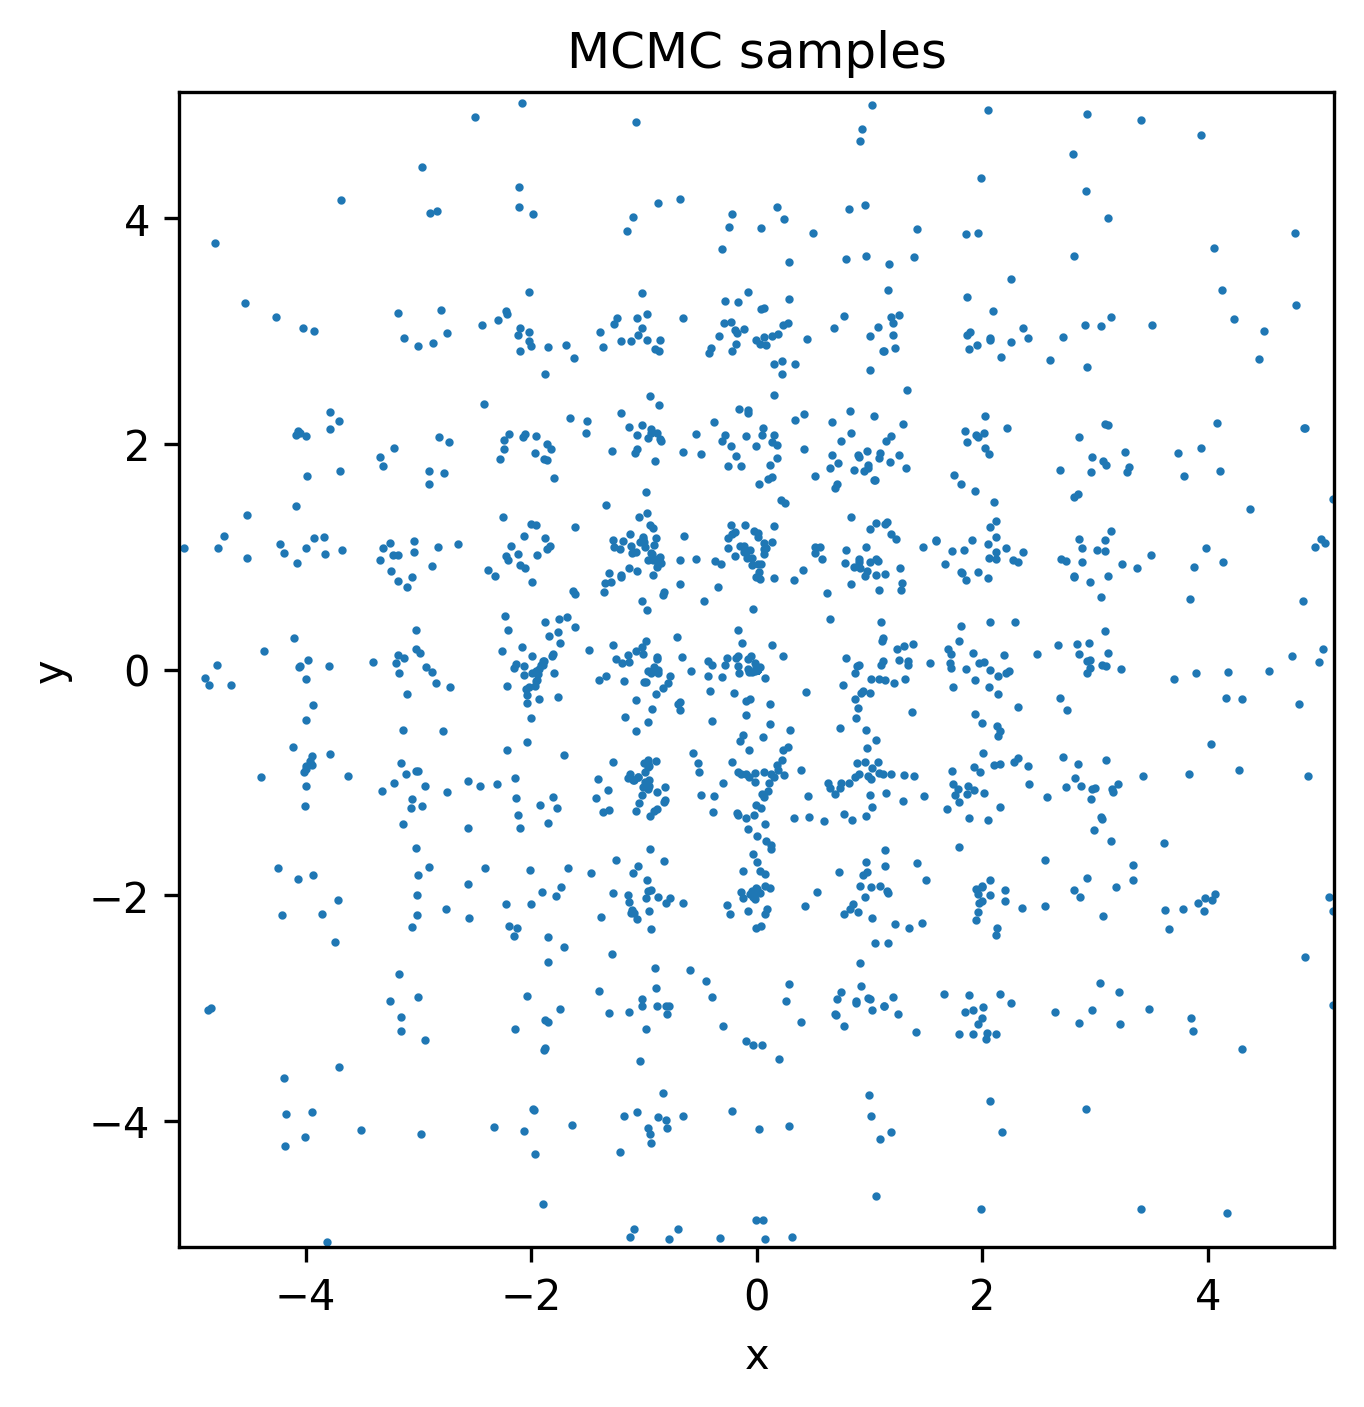

In [ ]:
x0 = [[0.0, 0.0]]

sampler = mc.sampler.PerfectSampler(target, proposal, x0, seed=seed)

T, num_samples = 4, 10000

samples = sampler.get_perfect_samples(T, num_samples)

fig, ax = plt.subplots(figsize=(5,5), dpi=300)
ax.scatter(samples[:, 0], samples[:, 1], s=1, c='C0')
ax.set_xlim(-5.12, 5.12)
ax.set_ylim(-5.12, 5.12)
ax.set_xlabel(f"x")
ax.set_ylabel(f"y")
ax.set_aspect('equal')
ax.set_title(f"MCMC samples")
plt.show()